# Lending Club Loan Data Analysis Project

### This notebook was compiled by <span style='color:Blue'> Neelkantho Bose  </span> as part of completing the course titled "Deep Learning".

## To perform the following tasks:
        1. Feature Transformation-Transform categorical values into numerical values (discrete)

        2. Exploratory data analysis of different factors of the dataset.
        3. Additional Feature Engineering
            ●	You will check the correlation between features and will drop those features which have a strong correlation
            ●	This will help reduce the number of features and will leave you with the most relevant features

        4. Modeling
            ●	After applying EDA and feature engineering, you are now ready to build the predictive models
            ●	In this part, you will create a deep learning model using Keras with Tensorflow backend

Note:
1. There may be cells that contain rough code (mostly commented out). Pls ignore them.


## 1. Loading Dataset and Quality Checks

### 1.1 Make the necessary imports

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import TensorFlow and required layers for building the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

### 1.2 Load the Loan Dataset .csv into a Pandas Dataframe

In [97]:
loan_data_df=pd.read_csv("loan_data.csv")

In [5]:
loan_data_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### 1.3 Create Input Data for Model - Drop column "not.fully.paid" from Dataframe

In [98]:
input_data=loan_data_df.drop("not.fully.paid",axis=1)

### 1.4 Apply label encoding on Categorical Columns of input_data Dataframe

In [99]:

label_encoder = LabelEncoder()
input_data['purpose_encoded'] = label_encoder.fit_transform(input_data['purpose'])
input_data=input_data.drop("purpose",axis=1)

### 1.5 Check the correlation between features and drop those features which have a strong correlation

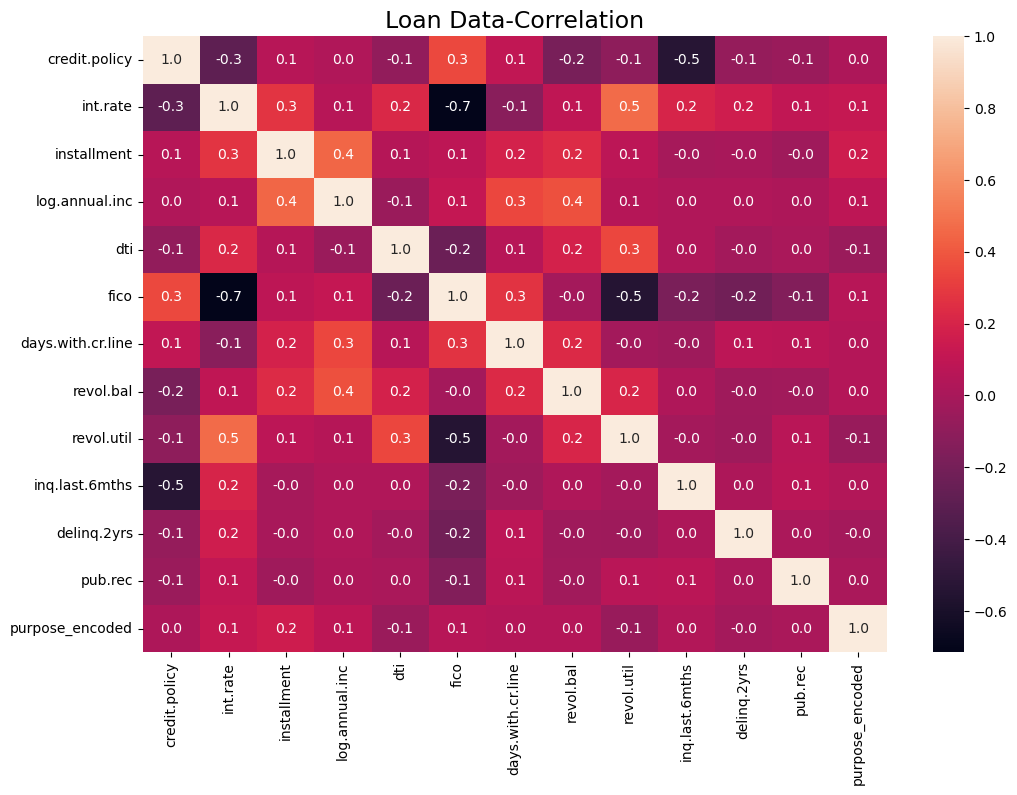

In [100]:
plt.figure(figsize=(12,8))
c=input_data.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Loan Data-Correlation",fontsize=17,c="k")
plt.show()

### 1.6 Observation - Necessary columns to be removed found through correlation matrix

In [113]:
# The following columns have a high correlation with other features, hence dropping them.
'inq.last.6mths','fico','inq.last.6mths','revol.util'

('inq.last.6mths', 'fico', 'inq.last.6mths', 'revol.util')

### 1.7 Drop the Columns from input_data and create Dataframe with only relevant columns

In [102]:
input_relevant=input_data.drop(columns=['inq.last.6mths','fico','inq.last.6mths','revol.util'],axis=1)

In [103]:
input_relevant

,credit.policy,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,delinq.2yrs,pub.rec,purpose_encoded
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854,0,0,2
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,0,0,1
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511,0,0,2
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667,0,0,2
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,10474.000000,215372,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,4380.000000,184,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,3450.041667,10036,0,0,2
9576,0,0.1600,351.58,10.819778,19.18,1800.000000,0,0,0,4


### 1.8 Create the Output_Data from "not.fully.paid" column in Loan Dataset

In [114]:
output_data=loan_data_df["not.fully.paid"]

### 1.9 Create Train and Test data using train_test_split

In [115]:

train_data, test_data, train_pred, test_pred = train_test_split(input_relevant, output_data, test_size=0.2, random_state=42)

### 1.10 Standardize the features using scaling

In [117]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_data)
test_features = scaler.transform(test_data)

# Print the standardized training features
print(train_features)

[[ 0.49256555  0.8687074   0.04912236 ... -0.29883115 -0.23913127
   1.81870037]
 [ 0.49256555 -1.43196309 -0.39175655 ... -0.29883115 -0.23913127
  -0.54946588]
 [ 0.49256555 -0.28348024 -0.86550291 ... -0.29883115 -0.23913127
   0.04257569]
 ...
 [ 0.49256555  0.74644955  1.95151386 ... -0.29883115 -0.23913127
   0.04257569]
 [ 0.49256555 -0.21679414 -0.33579959 ... -0.29883115 -0.23913127
   0.04257569]
 [ 0.49256555  0.59455343  0.04902554 ... -0.29883115 -0.23913127
   0.04257569]]


## 2. Build a Deep Learning using Tensorflow and Keras

### 2.1 Define a function to build the neural network model

In [120]:
def build_model():
    model = keras.Sequential([
        # Input layer with 20 units and ReLU activation
        Dense(20, activation=tf.nn.relu, input_shape=[train_features.shape[1]]),
        # Output layer with 1 unit
        Dense(1)
    ])

    # Compile the model with Adam optimizer and mean absolute error loss
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss='mae',
                  metrics=['accuracy','mean_absolute_error'])
    return model


### 2.2 Build the model, apply early stopping callback and validation split of 10%

In [121]:
model = build_model()

# Early stopping callback to stop training if validation loss doesn't improve for 50 epochs
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# Train the model with training data, using 10% of the data for validation
history = model.fit(train_features, train_pred, epochs=200, verbose=1, validation_split=0.1,
                    callbacks=early_stop
                   )

# Create a Pandas DataFrame from the training history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


# Extract the final mean absolute error from the validation set
mae_final = float(hist['val_mean_absolute_error'].iloc[-1])

print()
print('Final Mean Absolute Error on validation set: {}'.format(round(mae_final, 3)))


Epoch 1/200
216/216 [==============================] - 1s 2ms/step - loss: 0.3046 - accuracy: 0.8010 - mean_absolute_error: 0.3046 - val_loss: 0.2251 - val_accuracy: 0.8422 - val_mean_absolute_error: 0.2251
Epoch 2/200
216/216 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.8381 - mean_absolute_error: 0.2161 - val_loss: 0.1955 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1955
Epoch 3/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.8389 - mean_absolute_error: 0.1972 - val_loss: 0.1844 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1844
Epoch 4/200
216/216 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.8392 - mean_absolute_error: 0.1888 - val_loss: 0.1796 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1796
Epoch 5/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.8393 - mean_absolute_error: 0.1843 - val_loss: 0.1767 - val_accuracy: 0.8449

216/216 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.8392 - mean_absolute_error: 0.1627 - val_loss: 0.1564 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1564
Epoch 41/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.8392 - mean_absolute_error: 0.1625 - val_loss: 0.1574 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1574
Epoch 42/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.8392 - mean_absolute_error: 0.1627 - val_loss: 0.1569 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1569
Epoch 43/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.8392 - mean_absolute_error: 0.1628 - val_loss: 0.1576 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1576
Epoch 44/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.8392 - mean_absolute_error: 0.1630 - val_loss: 0.1578 - val_accuracy: 0.8449 - val_m

216/216 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.8392 - mean_absolute_error: 0.1621 - val_loss: 0.1562 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1562
Epoch 80/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.8392 - mean_absolute_error: 0.1621 - val_loss: 0.1565 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1565
Epoch 81/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.8392 - mean_absolute_error: 0.1620 - val_loss: 0.1561 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1561
Epoch 82/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.8392 - mean_absolute_error: 0.1622 - val_loss: 0.1565 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1565
Epoch 83/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.8392 - mean_absolute_error: 0.1621 - val_loss: 0.1568 - val_accuracy: 0.8449 - val_m

216/216 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.8392 - mean_absolute_error: 0.1616 - val_loss: 0.1560 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1560
Epoch 119/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.8392 - mean_absolute_error: 0.1618 - val_loss: 0.1562 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1562
Epoch 120/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.8392 - mean_absolute_error: 0.1618 - val_loss: 0.1557 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1557
Epoch 121/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.8392 - mean_absolute_error: 0.1616 - val_loss: 0.1558 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1558
Epoch 122/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.8392 - mean_absolute_error: 0.1618 - val_loss: 0.1557 - val_accuracy: 0.8449 - v

216/216 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.8393 - mean_absolute_error: 0.1612 - val_loss: 0.1552 - val_accuracy: 0.8462 - val_mean_absolute_error: 0.1552
Epoch 158/200
216/216 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.8397 - mean_absolute_error: 0.1611 - val_loss: 0.1552 - val_accuracy: 0.8462 - val_mean_absolute_error: 0.1552
Epoch 159/200
216/216 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.8394 - mean_absolute_error: 0.1611 - val_loss: 0.1551 - val_accuracy: 0.8462 - val_mean_absolute_error: 0.1551
Epoch 160/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.8397 - mean_absolute_error: 0.1611 - val_loss: 0.1554 - val_accuracy: 0.8462 - val_mean_absolute_error: 0.1554
Epoch 161/200
216/216 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.8393 - mean_absolute_error: 0.1610 - val_loss: 0.1551 - val_accuracy: 0.8462 - v

216/216 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.8402 - mean_absolute_error: 0.1607 - val_loss: 0.1555 - val_accuracy: 0.8462 - val_mean_absolute_error: 0.1555
Epoch 197/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.8403 - mean_absolute_error: 0.1607 - val_loss: 0.1551 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1551
Epoch 198/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.8403 - mean_absolute_error: 0.1607 - val_loss: 0.1552 - val_accuracy: 0.8462 - val_mean_absolute_error: 0.1552
Epoch 199/200
216/216 [==============================] - 1s 3ms/step - loss: 0.1606 - accuracy: 0.8405 - mean_absolute_error: 0.1606 - val_loss: 0.1552 - val_accuracy: 0.8449 - val_mean_absolute_error: 0.1552
Epoch 200/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.8402 - mean_absolute_error: 0.1606 - val_loss: 0.1550 - val_accuracy: 0.8462 - v

### 2.3 Evaluating the Train and Test Accuracy

In [71]:
hist

,loss,accuracy,mean_absolute_error,val_loss,val_accuracy,val_mean_absolute_error,epoch
0,0.220232,0.827701,0.220232,0.181301,0.846154,0.181301,0
1,0.183944,0.839449,0.183944,0.175819,0.844850,0.175819,1
2,0.179154,0.839304,0.179154,0.175175,0.844850,0.175175,2
3,0.177304,0.839159,0.177304,0.172619,0.844850,0.172619,3
4,0.174750,0.839304,0.174750,0.169166,0.844850,0.169166,4
...,...,...,...,...,...,...,...
195,0.155756,0.845250,0.155756,0.155377,0.848761,0.155377,195
196,0.155438,0.845830,0.155438,0.154764,0.846154,0.154764,196
197,0.155759,0.845540,0.155759,0.154723,0.850065,0.154723,197
198,0.155636,0.845685,0.155636,0.157279,0.846154,0.157279,198


In [122]:
# Evaluate the model's performance on the test set
mae, _,_ = model.evaluate(test_features, test_pred)
print('Mean Absolute Error on test set: {}'.format(round(mae, 3)))

60/60 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.8403 - mean_absolute_error: 0.1605
Mean Absolute Error on test set: 0.16


In [123]:
# Evaluate the trained model on the test dataset
test_loss, test_accuracy,_ = model.evaluate(test_features, test_pred)

# The first number represents the average loss or error of the model's predictions on the test data.
# The second number represents the accuracy of the model on the test data.
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

60/60 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.8403 - mean_absolute_error: 0.1605
Test loss: 0.1604662388563156
Test accuracy: 0.8402922749519348


In [136]:

# Make predictions
y_train_pred = model.predict(train_features)
y_test_pred = model.predict(test_features)


y_train_pred=np.argmax(y_train_pred, axis=1)
y_test_pred=np.argmax(y_test_pred, axis=1)


# Compute accuracy
train_accuracy = accuracy_score(train_pred, y_train_pred)
test_accuracy = accuracy_score(test_pred, y_test_pred)

# Compute other evaluation metrics
train_conf_matrix = confusion_matrix(train_pred, y_train_pred)
test_conf_matrix = confusion_matrix(test_pred, y_test_pred)
train_class_report = classification_report(train_pred, y_train_pred)
test_class_report = classification_report(test_pred, y_test_pred)


# Print evaluation results
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)


60/60 [==============================] - 0s 1ms/step
Training Accuracy: 0.8397285304098147
Testing Accuracy: 0.8408141962421712
Training Confusion Matrix:
 [[6434    0]
 [1228    0]]
Testing Confusion Matrix:
 [[1611    0]
 [ 305    0]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6434
           1       0.00      0.00      0.00      1228

    accuracy                           0.84      7662
   macro avg       0.42      0.50      0.46      7662
weighted avg       0.71      0.84      0.77      7662

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



C:\Users\neelk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neelk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neelk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neelk\anaconda3\Lib\site-packages\sklearn\metr

**Observation:**

The output indicates the following:

- The evaluation was performed on the `test_features` and `test_pred`.
- The mean absolute error on the test set is also 0.1605.
- The accuracy of the model is ~.84.

